##**What is Fake News?**  
A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes(rumors) and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

*python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.*

##**Data Set Explanation:**  
The dataset we’ll use for this python project- we’ll call it news.csv. This dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

In [5]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Reading the Dataset

In [6]:
df = pd.read_csv('/content/drive/My Drive/Office_practice_python/Fake_news_detection_project/news.csv')

First five rows of the Data, to see the pattern and flow of the Data

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Bottom five rows

In [8]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [9]:
df.shape ## how many records are there in the Dataset

(6335, 4)

Checking the Labels in the Dataset

In [10]:
lables = df.label
lables.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

#split the dataset into train and test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], lables, test_size = 0.2, random_state = 7) ## Splitting the Data train size 80% and test size 20%

##**What is a TfidfVectorizer?**  
**TF (Term Frequency):** The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency)**: Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The **TfidfVectorizer** converts a collection of raw documents into a matrix of TF-IDF features.

Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 
(terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are 
to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of 
raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [12]:
#Initialize a TfidfVectorizer
tfidi_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [13]:
#Fit and transform train set, transform test set
tfidf_train = tfidi_vectorizer.fit_transform(x_train)
tfidf_test = tfidi_vectorizer.transform(x_test)

##**What is a PassiveAggressiveClassifier?**   
Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [14]:
#Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [15]:
#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain insight into the number 
of false and true negatives and positives.

In [16]:
#Build confusion matrix
Confusion_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [17]:
Confusion_matrix

array([[590,  48],
       [ 43, 586]])

So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.

Summary

Today, we learned to detect fake news with Python. We took a political dataset, implemented a TfidfVectorizer, 
initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 92.82% in magnitude.

In [18]:
import seaborn as sns

Visualizing thye Confusion Matrix

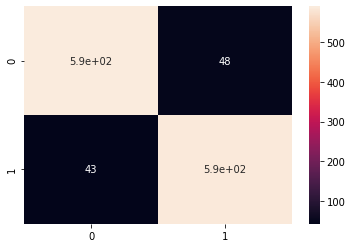

In [19]:
sns.heatmap(Confusion_matrix, annot=True)

Checking with another Vectorizer which `CountVectorizer`

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
Countvector = CountVectorizer(stop_words= 'english', max_df= 0.7)

In [57]:
count_train = Countvector.fit_transform(x_train)
count_test = Countvector.transform(x_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier()
rfc.fit(count_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_pred = rfc.predict(count_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.58%


In [61]:
Confusion_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [62]:
Confusion_matrix

array([[567,  71],
       [ 61, 568]])

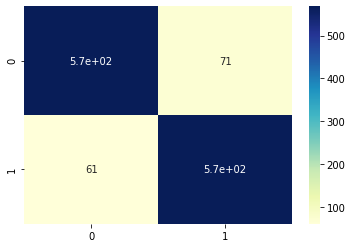

In [64]:
sns.heatmap(Confusion_matrix, annot=True, cmap="YlGnBu")

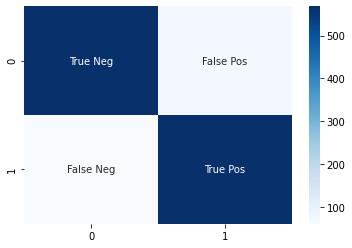

In [69]:
labl = ['True Neg','False Pos','False Neg','True Pos']
labl = np.asarray(labl).reshape(2,2)
sns.heatmap(Confusion_matrix, annot=labl, fmt='', cmap='Blues')